In [1]:
#loading the dependecies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the data
fraud_data= pd.read_csv('Fraud_check (1).csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# <font color=orange> Data preprocessing</font>

In [4]:
#algorithm to classify good and risky customers
def risky(x):
    status=[]
    for i in x:
        if i<=30000:
            status.append('risky')
        elif i >30000:
            status.append('Good') 
    return status


In [5]:
a=fraud_data['Taxable.Income']

In [6]:
fraud_status = pd.DataFrame(risky(a),columns=['status'])

In [7]:
fraud_data['status']=fraud_status

In [8]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [9]:
fraud_data.rename(columns={'Marital.Status': 'Marital_Status'},inplace=True)

In [10]:
#label enocoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fraud_data['Undergrad']= le.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital_Status']= le.fit_transform(fraud_data['Marital_Status'])
fraud_data['Urban']= le.fit_transform(fraud_data['Urban'])
fraud_data['status']= le.fit_transform(fraud_data['status'])
fraud_data

,Undergrad,Marital_Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


Good = 0,
Risky = 1


# <font color=orange> Data Visulization</font>

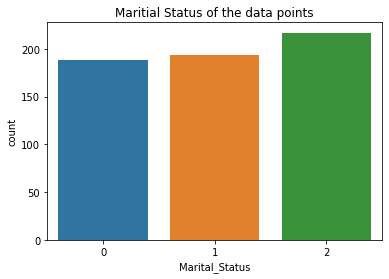

In [13]:
plt.title("Maritial Status of the data points")
sns.countplot(fraud_data['Marital_Status']);

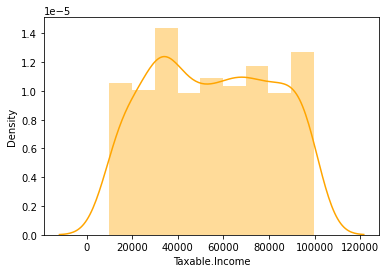

In [30]:
sns.distplot(fraud_data['Taxable.Income'],color='orange');

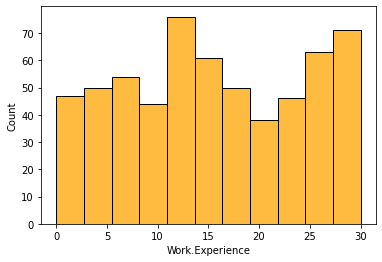

In [31]:
sns.histplot(fraud_data['Work.Experience'],color='orange');

<AxesSubplot:xlabel='Work.Experience', ylabel='Taxable.Income'>

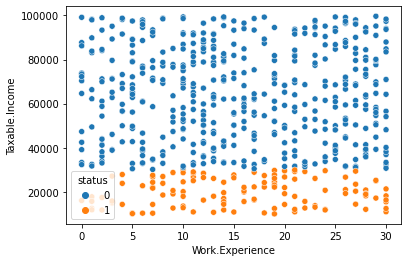

In [27]:
sns.scatterplot(y='Taxable.Income',x='Work.Experience',data=fraud_data,hue='status')

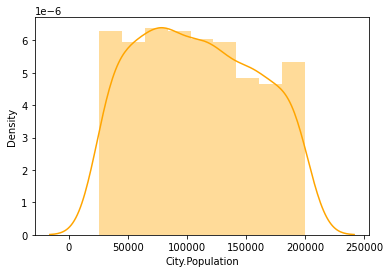

In [32]:
sns.distplot(fraud_data['City.Population'],color='orange');

In [33]:
X=fraud_data.iloc[:,0:6]
Y=fraud_data['status']

In [34]:
X.drop('Marital_Status',axis=1,inplace=True)

In [35]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.22)

# <font color=orange>Model Building</font>

In [36]:
num_trees = 100
max_features = 3
model_rf = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model_rf.fit(X_train,Y_train)

RandomForestClassifier(max_features=3)

In [37]:
pred=model_rf.predict(X_test)

In [38]:
#model validataion
#cross val score
kfold= KFold(n_splits=10)
cross_val_score(model_rf,X,Y,cv=kfold).mean()*100

99.83333333333334

#### <font color= orange> The model has very good accuracy. </font>